# <b>Combined Cycle Power Plant Using Multiple Linear Regression</b>
The "Combined Cycle Power Plant" dataset contains the following features (variables):

* <b>Temperature :</b> The temperature measured in °C.

* <b>Pressure :</b> The ambient pressure measured in millibars.

* <b>Humidity :</b> The relative humidity measured in percent.

* <b>Vacuum :</b> The exhaust vacuum measured in cm Hg.

* <b>Energy Output :</b> The electrical energy output of the power plant measured in MW.

These features are used to estimate the electrical energy output of a combined cycle power plant. Each instance in the dataset represents a specific combination of these features and the corresponding electrical energy output.

For this purpose, I will estimate a multiple linear regression model and obtain its determination coefficient.

## <b>Importing the libraries</b>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Importing the dataset</b>

In [14]:
dataSet =pd.read_excel("dataset/Combined Cycle Power Plant.xlsx")

dataSet.rename(columns = {'AT':'Temperature', 
                     'V':'Vacuum', 
                     'AP':'Pressure',
                     'RH':'Humidity',
                     'PE':'Energy Output'}, inplace = True) 

X = dataSet.iloc[:,:-1].values
Y = dataSet.iloc[:,-1].values
print(f"The Value of X:\n")
print(X)
print(f"\nThe Value of Y:\n")
print(Y)

The Value of X:

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]

The Value of Y:

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [15]:
dataSet.columns

Index(['Temperature', 'Vacuum', 'Pressure', 'Humidity', 'Energy Output'], dtype='object')

In [16]:
dataSet.head()

,Temperature,Vacuum,Pressure,Humidity,Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## <b>Descriptive Statistics</b>

In [17]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics")) 
print(dataSet.describe())


              Descriptive Statistics              
       Temperature       Vacuum     Pressure     Humidity  Energy Output
count  9568.000000  9568.000000  9568.000000  9568.000000    9568.000000
mean     19.651231    54.305804  1013.259078    73.308978     454.365009
std       7.452473    12.707893     5.938784    14.600269      17.066995
min       1.810000    25.360000   992.890000    25.560000     420.260000
25%      13.510000    41.740000  1009.100000    63.327500     439.750000
50%      20.345000    52.080000  1012.940000    74.975000     451.550000
75%      25.720000    66.540000  1017.260000    84.830000     468.430000
max      37.110000    81.560000  1033.300000   100.160000     495.760000


## <b>Histograms</b>

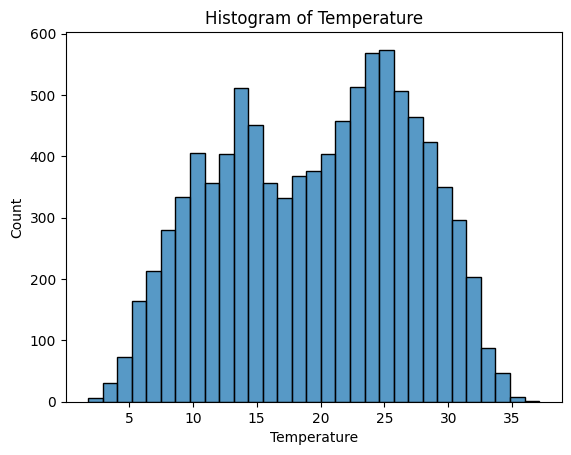

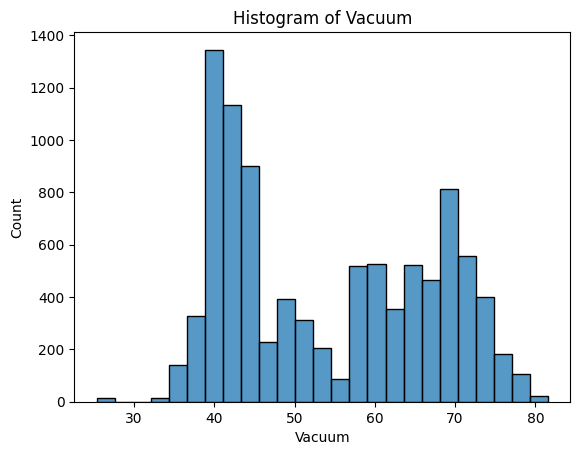

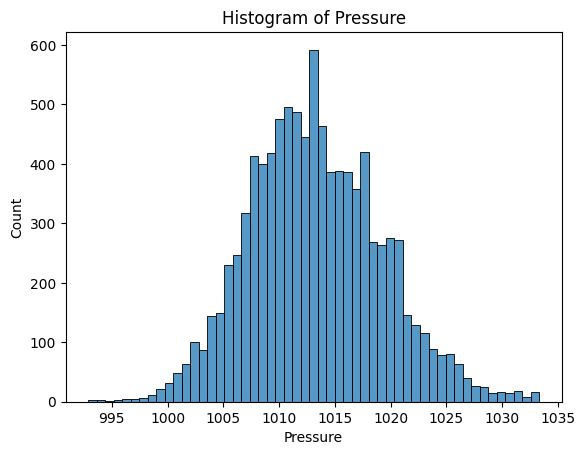

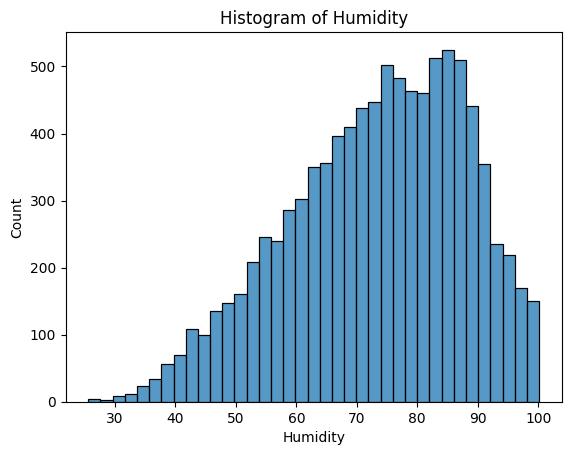

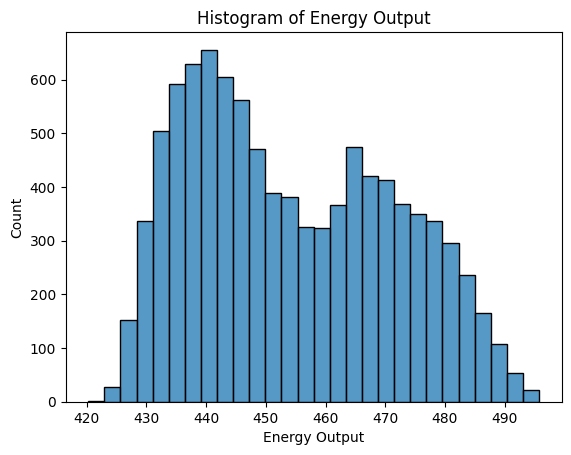

In [18]:
# Selecting our variables 
parameters = ["Temperature", "Vacuum", "Pressure", "Humidity", "Energy Output"] 
# Creating histograms 
for parameter in parameters: 
    sns.histplot(data = dataSet, x = parameter) 
    plt.title(f"Histogram of {parameter}") 
    plt.show()

## <b>Boxplots</b>

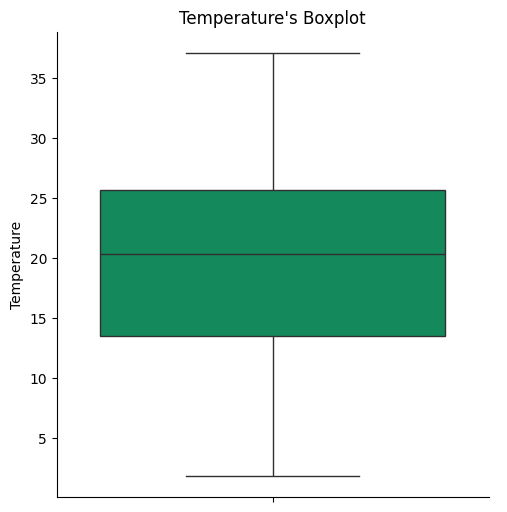

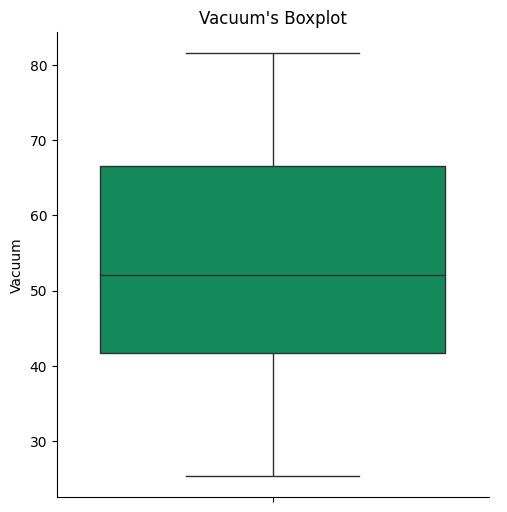

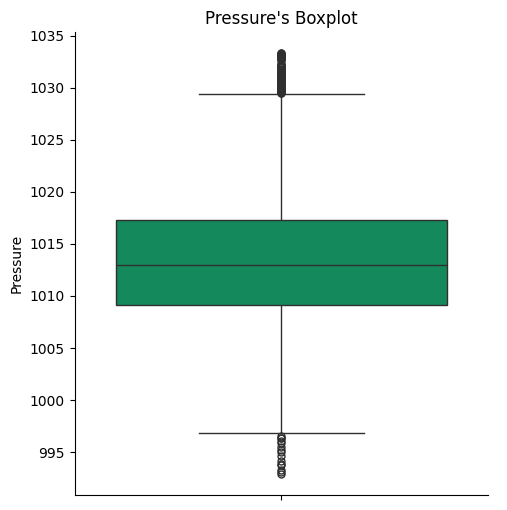

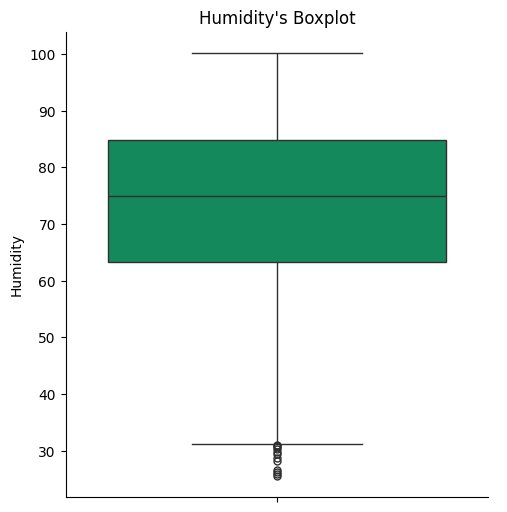

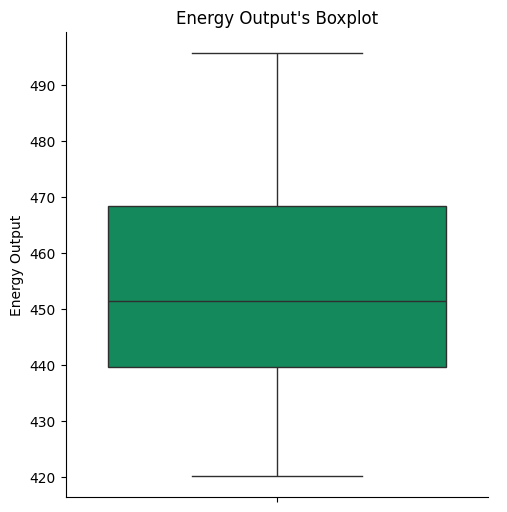

In [19]:
# Creting Boxplots 
for parameter in parameters: 
    sns.catplot(data=dataSet, y = parameter, kind = "box", color = "#009E60") 
    plt.title(f"{parameter}'s Boxplot") 
    plt.show()

## <b>Splitting the dataset into the Training and Test sets</b>

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =0)

## <b>Training the Multiple Linear Regression model on the Training set</b>

In [21]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

## <b>Predicting the Test set results</b>

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9325315554761303

In [24]:
W = regressor.coef_
b = regressor.intercept_

input_value = [8.34,40.77,1010.84,90.01]

f_wb = np.dot(W,input_value) + b
print(f_wb)

477.0864802653599
